In [48]:
import numpy as np
from qiskit import *
from math import sqrt, pi
with open('Qconfig_IBMQ_experience.py', 'r') as token_file:
    token = token_file.read()
IBMQ.save_account(token, overwrite = True)
IBMQ.load_account()
my_provider = IBMQ.get_provider()

ibmqfactory.load_account:WARNING:2020-10-15 03:17:32,676: Credentials are already in use. The existing account in the session will be replaced.


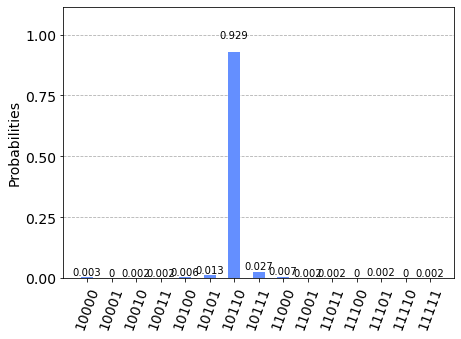

In [141]:
n = 4 #number of input qubits

qreg = QuantumRegister(n+1, 'q')
creg = ClassicalRegister(n+1, 'c')
qc = QuantumCircuit(qreg, creg)

theta = 2 * pi * 5 / 13
#initialization 
qc.h(range(n))
qc.x(n)

qc.barrier()
#applying cU(theta)

pw2 = 1
for k in range(n):
    for i in range(pw2):
        qc.cu1(theta, k, n)
    pw2 = pw2 * 2

qc.barrier()
#-QFT

# permutation
for k in range(n // 2):
    qc.swap(k, (n - 1) - k)
# rotations
for i in range(0,n):
    qc.h(i)
    for j in range(i+1,n):
        qc.cu1(- pi / 2**abs(j - i), i, j)

qc.barrier()
#Measurements
qc.measure(qreg,creg)

backend=Aer.get_backend('qasm_simulator')
jobIBM=execute(qc,backend=backend,shots=2048)
resultSim=jobIBM.result()

#backend  = my_provider.get_backend('ibmq_valencia')
#jobIBM=execute(qc,backend=backend,shots=2048)
#resultExp=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultSim.get_counts(qc)])
#plot_histogram([resultExp.get_counts(qc),resultSim.get_counts(qc)])


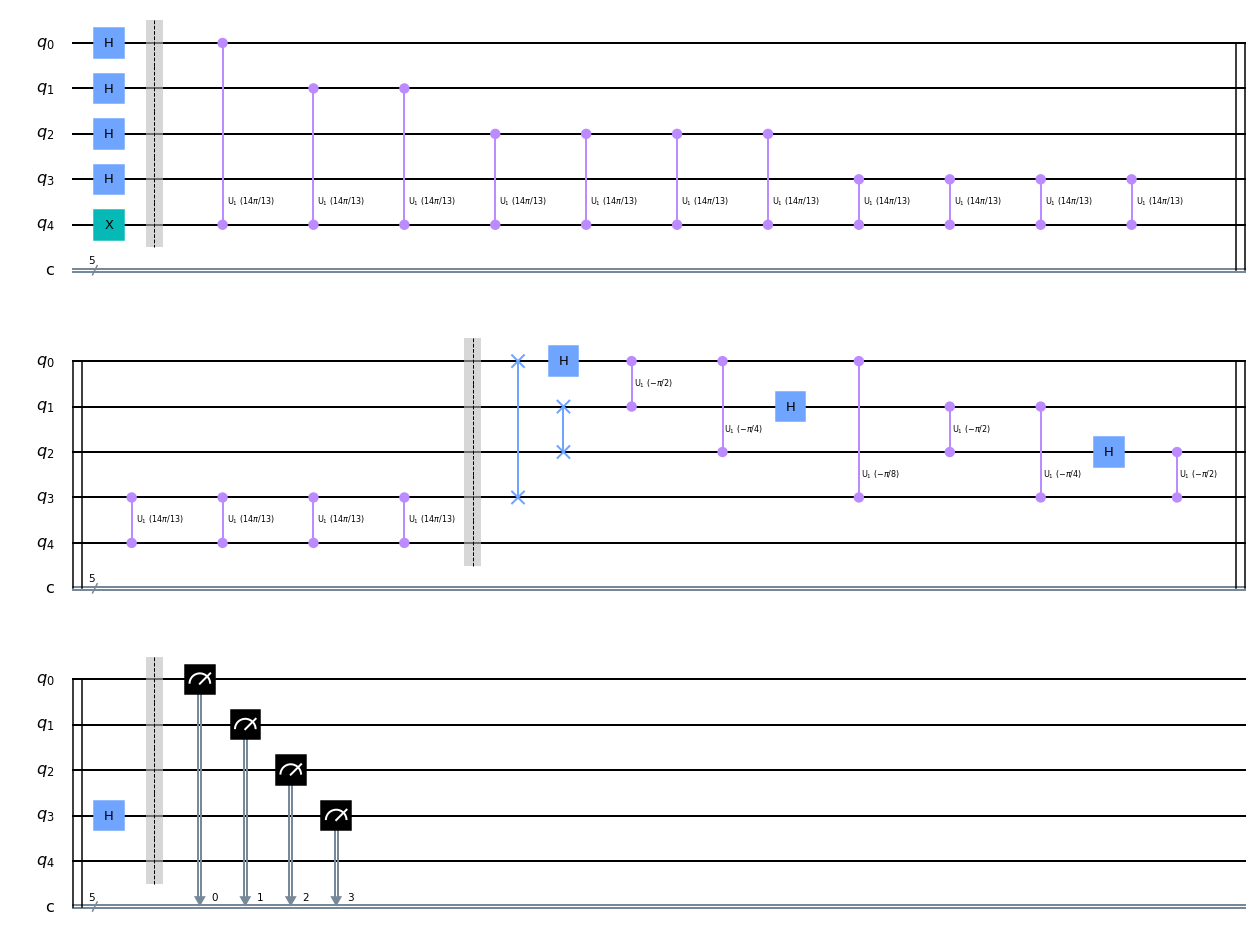

In [66]:
qc.draw(output = 'mpl')


In [145]:
import numpy as np
res = resultSim.get_counts(qc)
yres = list(res.values())
xres =  [int(item, base = 2)/16 - 1 for item in list(res.keys())]
thetaexp = np.dot(xres,yres)/2048 * 2 * pi

print(thetaexp, theta)
err = abs(thetaexp - theta) / theta
print(err)

2.372301288465144 2.4166097335306103
0.018334960937500103
